# Fit a set of data to a second-order polynomial

fit results: 
a = 7.281754 +/- 0.729598
b = -0.920938 +/- 0.822375
c = 0.014059 +/- 0.151658


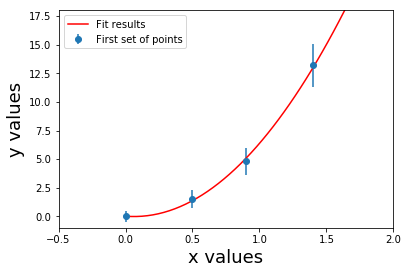

In [1]:
###############################################################
# This part loads some Python libraries that make plotting and
# analyzing your data much easier
###############################################################
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

%matplotlib inline

# A quadratic function. We will use this function in our fit to the data.
# y = ax^2 + bx + c
def quadfunc(x,a,b,c):
    return a*(x**2) + b*x + c

# First create some arrays to hold your data points. 
# Data points
x1 = np.array([0, 0.5, 0.9, 1.4])
y1 = np.array([0, 1.5, 4.8, 13.2])
y1err = np.array([0.5, 0.8, 1.2, 1.9])

# MAKE SURE THERE ARE THE SAME NUMBER OF POINTS IN YOUR X AND Y ARRAY!
# This is a common mistake
if len(x1)!=len(y1) or len(y1err)!=len(y1):
    print("These should all be equal! %d %d" % (len(x1),len(y1)))
    
# Plot just these two sets of data points
plt.figure()
plt.errorbar(x1,y1,yerr=y1err,fmt="o",label="First set of points")

# Now fit the data! Store the output in two variables:
# fitresults and fituncertainties
fitresults,fituncertainties = curve_fit(quadfunc,x1,y1,sigma=y1err)

print("fit results: ")
print("a = %f +/- %f" % (fitresults[0],np.sqrt(fituncertainties[0][0])))
print("b = %f +/- %f" % (fitresults[1],np.sqrt(fituncertainties[1][1])))
print("c = %f +/- %f" % (fitresults[2],np.sqrt(fituncertainties[2][2])))

# Plot the results of the fit
# We need some x-values for the fit.
xfitpts = np.linspace(0,2) # This should span the range of x1

# Then we use a helper function, poly1d, which takes the coefficients
# of the quadratic function and calculate the y-values
fitpolynomial = plt.poly1d(fitresults)
yfitpts = fitpolynomial(xfitpts)

plt.plot(xfitpts,yfitpts,"r-",label="Fit results")

# Set the limits (ranges) on the x- and y-axes.
plt.xlim(-0.5,2.0)
plt.ylim(-1,18)

# Put some labels on the axes. Always a good thing! :)
plt.xlabel("x values",fontsize=18)
plt.ylabel("y values",fontsize=18)

# Add a legend. Note that this uses the "label" entry that you put 
# in your plots above.
plt.legend(loc="upper left")

# Uncomment the following to save the file as a .png format. 
# Feel free to change the name from "myfigure.png"
#plt.savefig("myfigure.png")

#------ HIT SHIFT-ENTER AFTER YOU TYPE THE ABOVE CODE -------#